In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F # adds some efficiency

In [2]:
from torch.utils.data import DataLoader # lets us load data in batches
from torchvision import datasets, transforms
from torchvision.utils import make_grid

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix # for evaluating results
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#PyTorch menyediakan dataset MNIST melalui torchvision
#Pada saat awal dipanggil, dataset didownload ke path tertentu di PC

#Pertama kita ubah image MNIST ke tensor
transform = transforms.ToTensor()

In [6]:
#download dataset ke path tertentu
#input 2 variabel ==> data training dan data testing

train_data = datasets.MNIST(root='\CNN\Data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='\CNN\Data', train=False, download=True, transform=transform)

In [7]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: \CNN\Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: \CNN\Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [9]:
#cek apakah huruf data train ke 0?
#cek labelling, disini dataset MNIST sudah memiliki label

image, label = train_data[0]
print('Shape:', image.shape, '\nLabel:', label)

Shape: torch.Size([1, 28, 28]) 
Label: 5


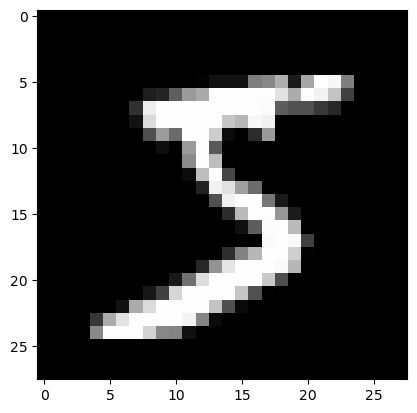

In [10]:
#cek Label 5 itu huruf apa? ditampilkan gambarnya

plt.imshow(image.reshape(28,28), cmap="gray");

In [11]:
#Data train ada 60.000 => sangat banyak parameter yang diperlukan untuk arsitektur
#Agar efisien, dilakukan training kecil2 menggunakan DataLoader
#Pada data citra, biasanya digunakan small batch
#Kita coba mulai dari batch kecil lalu batch besar

train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False) #data test tidak perlu di acak / shuffle

In [46]:
# Define layers

# panggil konvolusi 2D, karena citra
#setelah ketik nn.Conv2d klik Shift+Tab untuk mengetahui menu isian

#input channel = 1 karena citranya grayscale, output channels = 6 feature maps atau 6 filter, kernel size = 3x3, stride = 1
conv1 = nn.Conv2d(1, 6, 3, 1) # --> 6 filters --> pooling --> conv2
#input channel = 6 mengikuti output conv1, output channel = 16 (kalo bisa 2^n), kernel size = 3x3, stride =1   
conv2 = nn.Conv2d(6, 16, 3, 1)

In [47]:
# Grab the first MNIST record

for i, (X_train, y_train) in enumerate(train_data):
    break

In [48]:
X_train #batch of 1 image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [49]:
#cek ukuran single x_train
X_train.shape

torch.Size([1, 28, 28])

In [50]:
#y_train = target = label
#cek y_train pertama
y_train

5

In [51]:
#kita sudah desain untuk data train ada 10 batch_size ==> ada 10 citra setiap batch, data 4D
#4D tensor
#1 batch, 1 color channel image, 28 x 28 shape
x = X_train.view(1,1,28,28) # --> 4D batch (batch of 1 image)
x

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [52]:
# Perform the first convolution/activation from single image x
# choose fungsi aktivasi rectified linier unit (relu)

x = F.relu(conv1(x))
print(x.shape)

torch.Size([1, 6, 26, 26])


In [53]:
# Artinya apa dari hasil shape 26x26 ini? Bukankah tadi citranya berukuran 28x28?
# Efek dari konvolusi --> ukuran citra semakin kecil --> mengurangi informasi citra di bagian border
# Seharusnya ditambah padding untuk menjaga ukuran citra, namun mengapa tidak ditambahkan padding disini?
# Kita harus case by case. Karena citra MNIST bordernya tidak mengandung informasi, maka tidak perlu kita tambah padding

# torch.Size([1, 6, 26, 26]) --> 1 image, 6 filters, image size 26x26

In [54]:
# Run the first pooling layer

# input = x, kernel size = 2x2, stride 2 
# Mengapa stride = 2? karena kernel size nya 2x2 --> pelajari lagi konsep pooling layer
# desain menggunakan max pooling

x = F.max_pool2d(x, 2, 2)
print(x.shape)

torch.Size([1, 6, 13, 13])


In [55]:
# hasil nya berukuran 13x13 karena dilakukan kernel size 2x2 pada pooling layer
# menghasilkan citra berukuran separuhnya
# Hasil akhir dari layer 1

###################

In [56]:
###konv 2
# Perform the second convolution/activation
x = F.relu(conv2(x))
print(x.shape)

torch.Size([1, 16, 11, 11])


In [57]:
# 1 input, 16 filters, image size = 11x11 akibat proses konvolusi
# image size hasil pooling layer 1 = 13x13, skrg berkurang menjadi 11x11

In [58]:
# Run the second pooling layer
x = F.max_pool2d(x, 2, 2)
print(x.shape)

torch.Size([1, 16, 5, 5])


In [59]:
# Flatten the data
#-1 assumes whatever first batch size,we won't be dealing with just one single image
#keep the first dimension
x = x.view(-1, 5*5*16) 
print(x.shape)

torch.Size([1, 400])


In [60]:
# satu citra ada data flatten = 400
# jika ada 10 citra MNIST yg mewakili angka 0-9 maka ada 10x400

In [61]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1) #1color channel, 6 filters (output channel from layer1), 3x3 kernel, stride=1
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 120) #for fully connected layer, dgn 120 neurons
        self.fc2 = nn.Linear(120, 84) #120 input dari node fc1, jumlah neuron berikutnya dikurangi
        self.fc3 = nn.Linear(84,10) #output layer dari fully connected

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2) #input=X, kernel=2x2, stride=2
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16) #-1 agar kita bisa memvariasikan batch size
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1) #fungsi aktivasi bagian akhir, dimension=1 karena sudah 1 array flatten

In [62]:
torch.manual_seed(42) #42 = set weight tertentu yang ditetapkan
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [63]:
for param in model.parameters():
    print(param.numel()) #numel = number of elements / parameters

54
6
864
16
48000
120
10080
84
840
10


In [64]:
criterion = nn.CrossEntropyLoss() #karena multiclass classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) #learning rate

#jika learning rate terlalu kecil, maka optimizer akan butuh iterasi lama
#jika lr terlalu besar, beresiko akurasi kurang ==> overfitting, atau malah tidak konvergen

In [65]:
import time
start_time = time.time()

#VARIABLES 
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0 #training correct
    tst_corr = 0 #test correct
    
    # TRAIN batches, b = batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train)  # we don't flatten X-train here, keep data in 2D image
        loss = criterion(y_pred, y_train) #cek selisih error
 
        # The number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1] #check print(y_pred.data) to know data of one epoch, 1 = actual predicted value #diberi index first point, index[1] = labelnya
        batch_corr = (predicted == y_train).sum() #berapa yg correct dari batch dimana predicted points = train points ==> true 1/false 0 sum()
        trn_corr += batch_corr #jumlah correct selama training
        
        # Update parameters
        optimizer.zero_grad() # Clear gradients ==> parameters
        loss.backward() # Getting gradients ==> parameters
        optimizer.step() # Updating parameters
        
        # Print interim results, cek misalnya saat batch=600
        if b%600 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss.item())
    train_correct.append(trn_corr.item())
        
    # TESTING batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test)  #don't update weight and bias in test data

            # calculate the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

    current_time = time.time()
    total = current_time - start_time
print(f'\nDuration: {total/60} minutes') # print the time elapsed

epoch:  0  batch:  600 [  6000/60000]  loss: 0.04055625  accuracy:  78.417%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 0.08253475  accuracy:  85.800%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 0.36018986  accuracy:  88.689%
epoch:  0  batch: 2400 [ 24000/60000]  loss: 0.01818695  accuracy:  90.471%
epoch:  0  batch: 3000 [ 30000/60000]  loss: 0.00846517  accuracy:  91.623%
epoch:  0  batch: 3600 [ 36000/60000]  loss: 0.00114300  accuracy:  92.486%
epoch:  0  batch: 4200 [ 42000/60000]  loss: 0.62470782  accuracy:  93.129%
epoch:  0  batch: 4800 [ 48000/60000]  loss: 0.04621806  accuracy:  93.615%
epoch:  0  batch: 5400 [ 54000/60000]  loss: 0.00839208  accuracy:  94.039%
epoch:  0  batch: 6000 [ 60000/60000]  loss: 0.04479275  accuracy:  94.350%
epoch:  1  batch:  600 [  6000/60000]  loss: 0.00346417  accuracy:  97.767%
epoch:  1  batch: 1200 [ 12000/60000]  loss: 0.04895644  accuracy:  97.958%
epoch:  1  batch: 1800 [ 18000/60000]  loss: 0.00077808  accuracy:  97.972%
epoch:  1  b

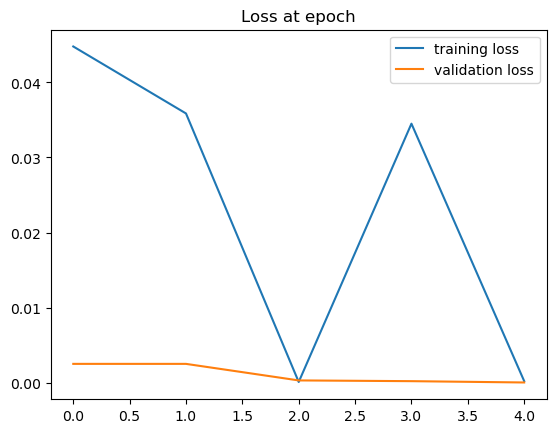

In [66]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at epoch')
plt.legend();

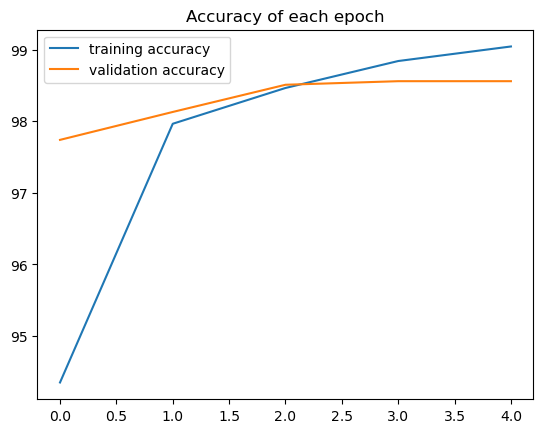

In [67]:
#accuracy at each epoch
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy of each epoch')
plt.legend();

In [68]:
# Evaluating all the test data
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)
# if we want to train the data, do shuffle = True, if not, just test, do shuffle = false

In [69]:
with torch.no_grad():  #don't update weight and bias in test data
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data))}%')

Test accuracy: 9856/10000 = 98.56%


In [70]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) #x:4 untuk memberikan spasi antar data
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 972    0    2    0    0    2    3    0    2    0]
 [   0 1135    4    1    1    0    4    7    0    3]
 [   2    0 1014    0    0    0    1    3    1    1]
 [   0    0    0 1000    0   17    0    0    1    0]
 [   0    0    1    0  979    0    2    0    1   16]
 [   0    0    0    1    0  859    0    0    1    2]
 [   3    0    0    0    0    3  945    0    0    0]
 [   1    0   11    5    0    1    0 1016    1    5]
 [   1    0    0    2    0    4    3    1  965   11]
 [   1    0    0    1    2    6    0    1    2  971]]


In [71]:
#Coba Tes 1 citra
test_data[2019]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [72]:
#terlihat pada citra di atas berlabel 9
#kita cek hasil citradari data tes tsb
#pertama kita hilangkan labelnya
test_data[2019][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

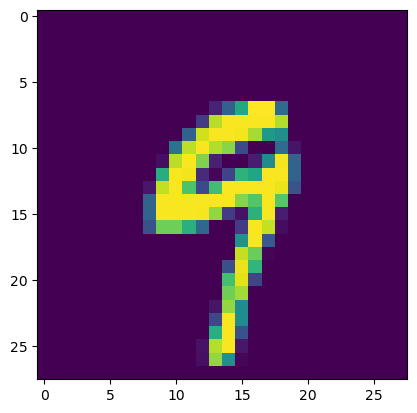

In [73]:
plt.imshow(test_data[2019][0].reshape(28,28)) #coba cek dengan tes data array lain
# ada 10000 data tes, sehingga kita bisa melakukan pengujian dari array 0..9999

In [74]:
#coba prediksi citra tersebut
model.eval()
with torch.no_grad():
    new_pred = model(test_data[2019][0].view(1,1,28,28)).argmax() #1 bath size, 1 color channel
    new_prediction = model(test_data[2019][0].view(1,1,28,28)) #1 bath size, 1 color channel
print("Predicted value:",new_pred.item())

#argmax untuk mengambil nilai probabilitas max. Setiap prediksi 0 - 9 akan dihitung probabilitasnya

Predicted value: 9


In [75]:
new_prediction

tensor([[-1.8860e+01, -1.8287e+01, -2.1837e+01, -1.5600e+01, -8.6730e+00,
         -1.6292e+01, -2.1851e+01, -1.2596e+01, -1.3427e+01, -1.7618e-04]])